In [31]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [30]:
mhealth = pd.read_excel("Data/merged.xlsx")

                                 OLS Regression Results                                
Dep. Variable:         log_death_rate   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.977
Method:                 Least Squares   F-statistic:                          1.277e+05
Date:                Thu, 02 Apr 2020   Prob (F-statistic):                        0.00
Time:                        17:36:19   Log-Likelihood:                         -7793.1
No. Observations:               14815   AIC:                                  1.560e+04
Df Residuals:                   14810   BIC:                                  1.563e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

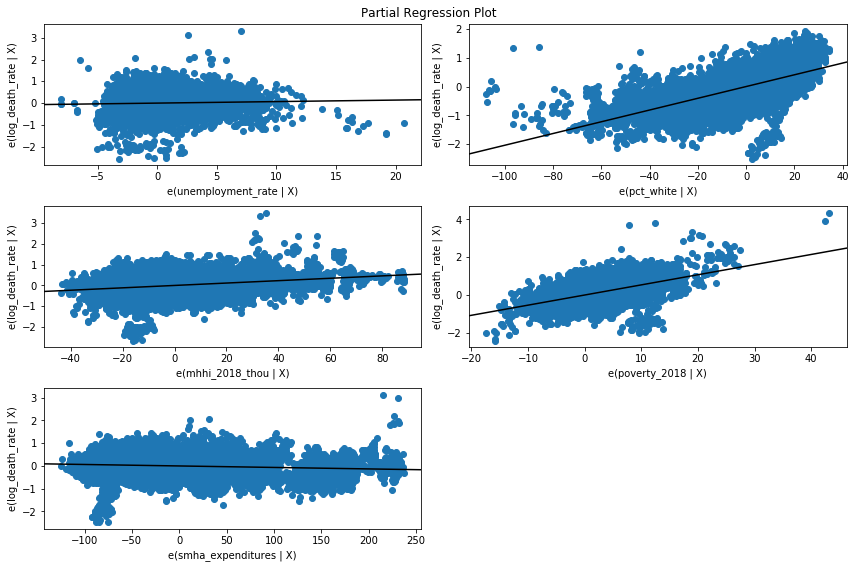

In [36]:
mhealth = mhealth.rename(columns = {"Crude Rate":"death_rate"})
mhealth["log_death_rate"] = np.log(mhealth["death_rate"])
mhealth["mhhi_2018_thou"] = mhealth["mhhi_2018"] / 1000
mhealth["gdp_per_capita_thou"] = mhealth["gdp_per_capita"] / 1000
mhealth["log_gdp_per_capita"] = np.log(mhealth["gdp_per_capita"])


y = mhealth["log_death_rate"]
X = mhealth[["unemployment_rate", "pct_white",  "mhhi_2018_thou", "poverty_2018", "smha_expenditures"]]

model = sm.OLS(y,X).fit()

print(model.summary())

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)